Hola **Juan**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a> 
Disculpa no se porque no se subió mi cuaderno correctamente, lo bueno que lo había guardado en mi computadora, ahora lo vuelvo a subir.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class="tocSkip"></a>
    
Hola Juan, para este sprint debes usar otros dataset. Por favor, revisa la descripción del proyecto para que uses el dataset correcto y además que sigas los pasos adecuados.
    
   
Ahí encuentras cada punto a resolver y cómo será evaluado el proyecto, si tienes dificultad para resolverlo puedes usar los canales de ayuda o contactar a tu CM para que te ayuden agendando una tutoría si es necesario.

# Sprint 9

## Paso 1. Carga y revisión de datos para el análisis

In [4]:
import pandas as pd


visits = pd.read_csv('/datasets/visits_log_us.csv')
print(visits.head(5))
print()
print(visits.info())
print()
costs = pd.read_csv('/datasets/costs_us.csv')
print(costs.head(5))
print()
print(costs.info())
print()
orders = pd.read_csv('/datasets/orders_log_us.csv')
print(orders.head(5))
print()
print(orders.info())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usag

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la carga de datos!
</div>

In [6]:
# Optimiza los datos para el análisis.
# Cambiamos minúsculas los titulos de las columnas.

visits.columns = visits.columns.str.lower()
costs.columns = costs.columns.str.lower()
orders.columns = orders.columns.str.lower()

# Cambiamos los espacios en blanco con un "_" en los títulos de las columnas

visits.columns = visits.columns.str.replace(' ', '_')
costs.columns = costs.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')

In [7]:
# Asegúrate de que cada columna contenga el tipo de datos correcto.

visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

print(visits.head(3))
print()
print(visits.info())
print()
print(costs.head(3))
print()
print(costs.info())
print()
print(orders.head(3))
print()
print(orders.info())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None

   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2       

In [8]:
# Unir los df visits y orders con merge en la columna uid

visits_orders = pd.merge(visits, orders, how='left', on='uid')
print(visits_orders.head(5))
print()
print(visits_orders.info())


    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid              buy_ts  revenue  
0  16879256277535980062                 NaT      NaN  
1    104060357244891740                 NaT      NaN  
2   7459035603376831527                 NaT      NaN  
3  16174680259334210214 2018-03-09 20:25:00     2.33  
4   9969694820036681168                 NaT      NaN  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023813 entries, 0 to 1023812
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   device     1023813 non-null  object        
 1   end_ts     102

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el preprocesamiento de tus datos y exploración inicial!
</div>

## Paso 2. Haz informes y calcula métricas

### Visitas:

In [11]:
# Cuenta el total de visitas por día, semana y mes (DAU, MAU Y WAU)

visits_orders['session_week']  = visits_orders['start_ts'].dt.isocalendar().week
visits_orders['session_month'] = visits_orders['start_ts'].dt.month
visits_orders['session_date']  = visits_orders['start_ts'].dt.date

print(visits_orders.head(3))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   

                    uid buy_ts  revenue  session_week  session_month  \
0  16879256277535980062    NaT      NaN            51             12   
1    104060357244891740    NaT      NaN             8              2   
2   7459035603376831527    NaT      NaN            26              7   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  


#### ¿Cuántas personas lo usan cada día, semana y mes?

In [13]:
# Agruparemos los datos por fecha/semana de la sesión y buscaremos los totales:

dau_total = visits_orders.groupby('session_date').agg({'uid': 'nunique'}).mean()
mau_total = visits_orders.groupby('session_month').agg({'uid': 'nunique'}).mean()
wau_total = visits_orders.groupby('session_week').agg({'uid': 'nunique'}).mean()

print('DAU=', dau_total)
print()
print('MAU=', mau_total)
print()
print('WAU=', wau_total)

DAU= uid    907.991758
dtype: float64

MAU= uid    23228.416667
dtype: float64

WAU= uid    5825.288462
dtype: float64


#### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [15]:
total_sessions_per_day = visits_orders.groupby('session_date').agg({'uid': 'count'})

# Total de sesiones por día en promedio
average_sessions_per_day = total_sessions_per_day.mean()
print('En total tenemos un promedio de', average_sessions_per_day)

En total tenemos un promedio de uid    2812.673077
dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo analizando la cantidad de visitantes!
</div>

#### ¿Cuál es la duración de cada sesión?

In [16]:
# Agregamos en una nueva columna llamada duration la duración de cada sesión restando end_ts menos start_ts.

visits_orders['duration'] = visits_orders['end_ts'] - visits_orders['start_ts']
print(visits_orders.head(3))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   

                    uid buy_ts  revenue  session_week  session_month  \
0  16879256277535980062    NaT      NaN            51             12   
1    104060357244891740    NaT      NaN             8              2   
2   7459035603376831527    NaT      NaN            26              7   

  session_date        duration  
0   2017-12-20 0 days 00:18:00  
1   2018-02-19 0 days 00:28:00  
2   2017-07-01 0 days 00:00:00  


In [17]:
# Encontrar la duración promedio de las sesiones (ASL)

ASL = visits_orders['duration'].mean()
print('La duración promedio de las sesiones es de', ASL)

La duración promedio de las sesiones es de 0 days 00:17:53.040014143


#### ¿Con qué frecuencia los usuarios regresan?

In [18]:
# Calculamos el sticky factor (sticky factor = DAU/MAU)

sticky_wau = (dau_total/wau_total)*100
print('sticky_wau =', sticky_wau)
sticky_mau = (dau_total/mau_total)*100
print('sticky_mau =', sticky_mau)

sticky_wau = uid    15.587069
dtype: float64
sticky_mau = uid    3.90897
dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con los cálculos!
</div>

### Ventas

### ¿Cuándo empieza la gente a comprar?:

In [25]:
first_purchase_dates = visits_orders.groupby('uid')['buy_ts'].min()
first_purchase_dates.name = 'first_purchase_datetime'
visits_orders = visits_orders.join(first_purchase_dates, on='uid', rsuffix='_first')

# En el DataFrame purchases, creamos una columna purchase_day para almacenar los meses recuperados de la columna purchase_datetime.
# visits_orders['purchase_day'] = visits_orders['buy_ts'].astype('datetime64[d]')
visits_orders['purchase_day'] = visits_orders['buy_ts'].dt.to_period('D')
visits_orders['first_purchase_day'] = visits_orders['first_purchase_datetime'].dt.to_period('D')

# Análisis de KPI, encontrar el tiempo que transcurre entre el registro y la conversión, cuantos ocurren el mismo día (categoría Conversion 0d). cuantos al día siguiente (conversion 1d).
# cohort_stats = purchases.groupby('first_purchase_month').agg({'uid': 'count'})

cohort_od = visits_orders[visits_orders['purchase_day'] == visits_orders['first_purchase_day']].agg({'uid': 'count'})
cohort_1d = visits_orders[visits_orders['purchase_day'] == visits_orders['first_purchase_day'] + pd.Timedelta(days=1)].agg({'uid': 'count'})
cohort_7d = visits_orders[visits_orders['purchase_day'] == visits_orders['first_purchase_day'] + pd.Timedelta(days=7)].agg({'uid': 'count'})

print('cohort_od=', cohort_od)
print()
print('cohort_1d=', cohort_1d)
print()
print('cohort_7d=', cohort_7d)

cohort_od= uid    108294
dtype: int64

cohort_1d= uid    7894
dtype: int64

cohort_7d= uid    3511
dtype: int64


#### Podemos ver en el análisis de las cohortes anterior que el grupo más grande personas compra el mismo día de su registro.

In [26]:
print(visits_orders.head(3))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   

                    uid buy_ts  revenue  session_week  session_month  \
0  16879256277535980062    NaT      NaN            51             12   
1    104060357244891740    NaT      NaN             8              2   
2   7459035603376831527    NaT      NaN            26              7   

  session_date        duration first_purchase_datetime purchase_day  \
0   2017-12-20 0 days 00:18:00                     NaT          NaT   
1   2018-02-19 0 days 00:28:00                     NaT          NaT   
2   2017-07-01 0 days 00:00:00                     NaT          NaT   

  first_purchase_day first_purchase_datetime_first  \
0                NaT                           NaT   
1                NaT                           NaT   
2  

### ¿Qué canal de marketing es más efectivo?

           first_purchase_date
source_id                     
1                       248662
2                       238297
3                        46766
4                        62683
5                       151824
7                            1
9                         9547
10                        4027


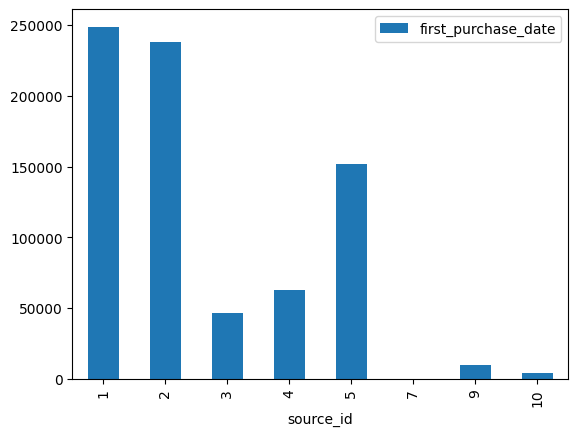

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos la columna 'purchase_date' con la compra del periodo por mes

visits_orders['purchase_date'] = visits_orders['buy_ts'].dt.to_period('M')
visits_orders['first_purchase_date'] = visits_orders['first_purchase_datetime'].dt.to_period('M')
cohort_stats = visits_orders.groupby('source_id').agg({'first_purchase_date': 'value_counts'})

# Sumamos el total de la columna first_purchase_date y lo agrupamos por la columna source_id

cohort_stats = cohort_stats.groupby('source_id').sum()
print(cohort_stats)

# Gráficamos cohort_stats x=source_id y=first_purchase_date

cohort_stats.plot(kind='bar')
plt.show()

#### En el gráfico anterior podemos ver que el canal de marketing es más efectivo es el y seguido del 2 y luego el 5, los menos efectivos son el 7, 10 y 9.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [28]:
# Compila una tabla dinámica para mostrar los cambios en las compras totales realizadas

purchase_pivot = visits_orders.pivot_table(
    index='first_purchase_date',
    columns='purchase_date',
    values='uid',
    aggfunc='count',
)
print(purchase_pivot)

purchase_date        2017-06  2017-07  2017-08  2017-09  2017-10  2017-11  \
first_purchase_date                                                         
2017-06              25839.0  25677.0  25127.0  38866.0  44356.0  32355.0   
2017-07                  NaN   8692.0   4006.0   8680.0   4384.0   2656.0   
2017-08                  NaN      NaN   6713.0   5353.0   5268.0   4705.0   
2017-09                  NaN      NaN      NaN  12257.0   5096.0   4513.0   
2017-10                  NaN      NaN      NaN      NaN  14519.0   3645.0   
2017-11                  NaN      NaN      NaN      NaN      NaN  20250.0   
2017-12                  NaN      NaN      NaN      NaN      NaN      NaN   
2018-01                  NaN      NaN      NaN      NaN      NaN      NaN   
2018-02                  NaN      NaN      NaN      NaN      NaN      NaN   
2018-03                  NaN      NaN      NaN      NaN      NaN      NaN   
2018-04                  NaN      NaN      NaN      NaN      NaN      NaN   

In [29]:
# Agrupamos por la fecha de compras mensuales y el mes de la compra

purchases_grouped_by_cohorts = purchases_grouped_by_cohorts = visits_orders.groupby(['first_purchase_date', 'purchase_date']).agg({'uid': 'count'})

orders_per_month = purchases_grouped_by_cohorts.groupby(level=0).cumsum()

# Agregamos la columna purchases_per_month al DataFrame purchases_grouped_by_cohorts. En esta columna, calcula el promedio de ordenes por mes.
orders_per_month = orders_per_month.reset_index()
purchases_grouped_by_cohorts['purchases_per_month'] = (purchases_grouped_by_cohorts['uid'] / orders_per_month.set_index(['first_purchase_date', 'purchase_date'])['uid']).round(2)

# Cambios en el número promedio de ordenes por mes en cada cohorte
mean_orders_pivot = purchases_grouped_by_cohorts.pivot_table(
    index='first_purchase_date',
    columns='purchase_date',
    values='purchases_per_month',
    aggfunc='sum',
)
print(mean_orders_pivot)

purchase_date        2017-06  2017-07  2017-08  2017-09  2017-10  2017-11  \
first_purchase_date                                                         
2017-06                  1.0      0.5     0.33     0.34     0.28     0.17   
2017-07                  NaN      1.0     0.32     0.41     0.17     0.09   
2017-08                  NaN      NaN     1.00     0.44     0.30     0.21   
2017-09                  NaN      NaN      NaN     1.00     0.29     0.21   
2017-10                  NaN      NaN      NaN      NaN     1.00     0.20   
2017-11                  NaN      NaN      NaN      NaN      NaN     1.00   
2017-12                  NaN      NaN      NaN      NaN      NaN      NaN   
2018-01                  NaN      NaN      NaN      NaN      NaN      NaN   
2018-02                  NaN      NaN      NaN      NaN      NaN      NaN   
2018-03                  NaN      NaN      NaN      NaN      NaN      NaN   
2018-04                  NaN      NaN      NaN      NaN      NaN      NaN   

#### Revisando las mediciones anteriores podemos ver cuantos pedidos se hacen por mes así como el cambio en estos en cada periodo. Vemos que el primer cohorte de junio de 2017 así como el de noviembre del mismo año y el de marzo de 2018 han sido los más importantes

### ¿Cuál es el tamaño promedio de compra?

In [30]:
# Total de ventas dividido entre el total de revenue

revenue_per_month = visits_orders.groupby('first_purchase_date').agg({'revenue': 'sum'})
print(revenue_per_month)

                          revenue
first_purchase_date              
2017-06              2.717652e+06
2017-07              5.155539e+05
2017-08              3.757915e+05
2017-09              1.680143e+06
2017-10              1.994744e+05
2017-11              3.892719e+05
2017-12              2.925601e+05
2018-01              1.813623e+05
2018-02              8.937845e+04
2018-03              4.011142e+05
2018-04              8.430222e+04
2018-05              3.560077e+04
2018-06              3.420000e+00


#### En la tabla anterior podemos ve el promedio de la compra mensual, viendo que el mes de febrero y abril de 2018 son los más altos, mientras que septiembre y octubre de 2017 y enero de 2018 lo más bajos.Tendríamos que revisar si esto se debe a factores externos o a temporalidad, que en el caso de enero se podría entender.

### ¿Cuánto dinero traen? Cálcula el LTV)

In [31]:
# Calcula el número de nuevos clientes para cada fecha (o rango de fechas, en este caso, para cada mes).

cohort_sizes = visits_orders.groupby('first_purchase_date').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_date', 'cohort_size']

print(cohort_sizes.head(5))

  first_purchase_date  cohort_size
0             2017-06         2023
1             2017-07         1923
2             2017-08         1370
3             2017-09         2581
4             2017-10         4340


In [32]:

# Agrupamos la tabla de pedidos por mes de la primera compra y mes de la compra y totalizar los ingresos.

cohorts = visits_orders.groupby(['first_purchase_date', 'purchase_date']).agg({'revenue': 'sum'}).reset_index()

print(cohorts.head(5))

  first_purchase_date purchase_date    revenue
0             2017-06       2017-06  148121.29
1             2017-06       2017-07  155869.55
2             2017-06       2017-08  114898.83
3             2017-06       2017-09  374481.76
4             2017-06       2017-10  351833.14


In [33]:
report = pd.merge(cohort_sizes, cohorts, on='first_purchase_date')
print(report.head(5))

  first_purchase_date  cohort_size purchase_date    revenue
0             2017-06         2023       2017-06  148121.29
1             2017-06         2023       2017-07  155869.55
2             2017-06         2023       2017-08  114898.83
3             2017-06         2023       2017-09  374481.76
4             2017-06         2023       2017-10  351833.14


In [34]:
# Consideraremos un margin_rate de 0.5

margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['purchase_date'].dt.year - report['first_purchase_date'].dt.year) * 12 + (report['purchase_date'].dt.month - report['first_purchase_date'].dt.month)
report['age'] = report['age'].round().astype('int')

report.head()

,first_purchase_date,cohort_size,purchase_date,revenue,gp,age
0,2017-06,2023,2017-06,148121.29,74060.645,0
1,2017-06,2023,2017-07,155869.55,77934.775,1
2,2017-06,2023,2017-08,114898.83,57449.415,2
3,2017-06,2023,2017-09,374481.76,187240.880,3
4,2017-06,2023,2017-10,351833.14,175916.570,4


In [35]:
report['ltv'] = report['gp'] / report['cohort_size']

output = report.pivot_table(
    index='first_purchase_date',
    columns='age',
    values='ltv',
    aggfunc='mean').round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_date,,,,,,,,,,,,
2017-06,37.0,39.0,28.0,93.0,87.0,55.0,89.0,51.0,62.0,53.0,55.0,24.0
2017-07,26.0,13.0,39.0,14.0,5.0,6.0,3.0,4.0,7.0,10.0,7.0,
2017-08,17.0,15.0,13.0,16.0,25.0,12.0,8.0,18.0,8.0,6.0,,
2017-09,33.0,30.0,11.0,159.0,19.0,24.0,32.0,11.0,6.0,,,
2017-10,10.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,,,,
2017-11,14.0,10.0,5.0,10.0,4.0,1.0,3.0,,,,,
2017-12,9.0,4.0,8.0,7.0,3.0,2.0,,,,,,
2018-01,9.0,6.0,8.0,2.0,1.0,,,,,,,
2018-02,6.0,3.0,1.0,1.0,,,,,,,,


#### En la tabla anterior podemos ver que la primer cohorte sigue siendo la más importante, además en la de septiembre vemos un gran crecimiento en el cuarto mes, podríamos analizar que paso en esa cohorte para ver si es posible repetir ese comportamiento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen análisis del LTV! Fuiste bastante detallado con los cálculos y las conclusiones
</div>

## Marketing:

### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [36]:
costs['month'] = costs['dt'].dt.strftime('%Y-%m')
print(costs.head(3))

   source_id         dt  costs    month
0          1 2017-06-01  75.20  2017-06
1          1 2017-06-02  62.25  2017-06
2          1 2017-06-03  36.53  2017-06


    month  source_id     costs
0       1          1   2186.18
1       1          2   4157.74
2       1          3  14808.78
3       1          4   5832.79
4       1          5   5371.52
..    ...        ...       ...
79     12          3  16219.52
80     12          4   7680.47
81     12          5   5872.52
82     12          9    657.98
83     12         10    645.86

[84 rows x 3 columns]


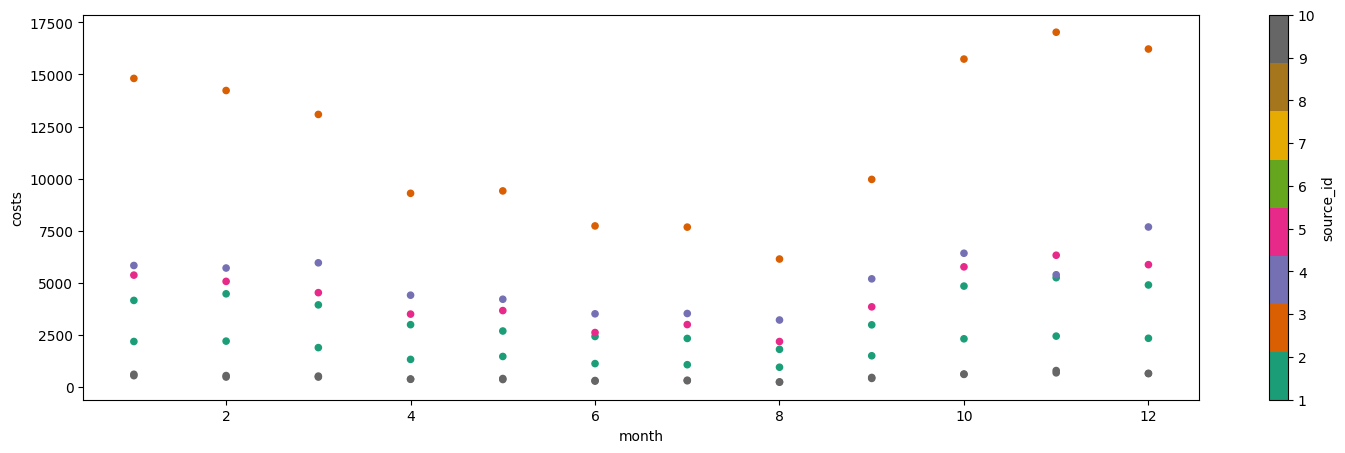

In [37]:
# Agrupar la tabla costs por fecha 'dt' y source_id sumando el monto de 'costs'

cost_per_source = costs.groupby(['dt', 'source_id']).agg({'costs': 'sum'})

# Crea una columna con el numero del mes de la columna 'dt'

cost_per_source['month'] = cost_per_source.index.get_level_values('dt').month

# Suma el total de 'costs' por 'month' y por 'source id'

cost_per_source = cost_per_source.groupby(['month', 'source_id']).agg({'costs': 'sum'})
cost_per_source = cost_per_source.reset_index()

print(cost_per_source)

# Haz una gráfica para el df costs_per_source
# Tamaño del gráfico 15 x 10

cost_per_source.plot(kind='scatter', x='month', y='costs', c='source_id', figsize=(18, 5), colormap= 'Dark2')
plt.show()

#### En la tabla y gráfico anterior podemos ver los gastos por source_id

### Cálcula el CAC y LTV por una cohort

In [39]:
# Encontremos el LTV de la primera cohorte sumando el valor de cada mes para poder sacar su CAC

ltv_201706 = output.loc['2017-06'].sum()

cohort_201706 = report[report['first_purchase_date'] == '2017-06']

# Calculamos los costos para el mes de la cohorte

costs_201706 = costs[costs['month'] == '2017-06']['costs'].sum()

n_buyers_201706 = cohort_201706['cohort_size'][0]

cac_201706 = costs_201706 / n_buyers_201706

ltv_201706 = output.loc['2017-06'].sum()

print('CAC de cohort 2017-06 =', cac_201706)
print('LTV de cohort 2017-06 =', ltv_201706)

CAC de cohort 2017-06 = 8.905091448344043
LTV de cohort 2017-06 = 673.0


#### Adquirir cada cliente le costó a la empresa un promedio de 8.90, mientras que cada cliente generó 673. Por lo tanto, la inversión en la adquisición de clientes valió la pena generó grandes beneficios, al menos este primer mes.

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


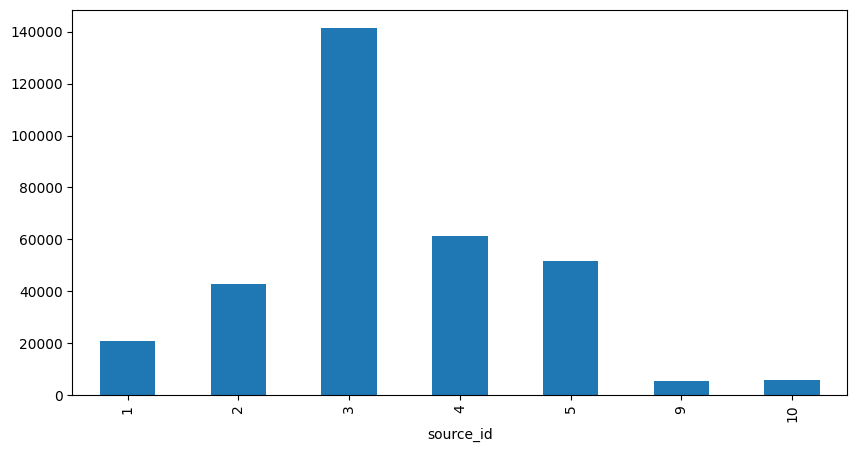

In [40]:
cac_per_source_id = costs.groupby('source_id')['costs'].sum()
print(cac_per_source_id)

grafica_cost_per_source = cac_per_source_id.plot(kind='bar', figsize=(10, 5))
plt.show()

### ¿Cuán rentables eran las inversiones? (ROMI)

In [43]:
print(report.head(3))
print(report.info())
print(costs.head(3))
print(costs.info())

  first_purchase_date  cohort_size purchase_date    revenue         gp  age  \
0             2017-06         2023       2017-06  148121.29  74060.645    0   
1             2017-06         2023       2017-07  155869.55  77934.775    1   
2             2017-06         2023       2017-08  114898.83  57449.415    2   

         ltv  
0  36.609315  
1  38.524357  
2  28.398129  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   first_purchase_date  79 non-null     period[M]
 1   cohort_size          79 non-null     int64    
 2   purchase_date        79 non-null     period[M]
 3   revenue              79 non-null     float64  
 4   gp                   79 non-null     float64  
 5   age                  79 non-null     int64    
 6   ltv                  79 non-null     float64  
dtypes: float64(3), int64(2), period[M](2)
memory usa

In [44]:
# Agrupamons en un nuevo df 'costs_per_month' la suma de los costos (columna 'costs') por mes (columna 'df')

costs_per_month = costs.groupby('month')['costs'].sum()

# Indicamos el nombre de las columnas month y costs

print(costs_per_month)

month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Name: costs, dtype: float64


In [45]:
# Nombramos columnas en el df costs_per_month como 'month' y 'costs'

costs_per_month.columns = ['month', 'costs']

print(costs_per_month.head())

month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
Name: costs, dtype: float64


In [47]:
# Cambiamos el tipo de dato de la columna month a period[M](2)

costs_per_month.index = pd.PeriodIndex(costs_per_month.index, freq='M')
print(costs_per_month.head(5))

month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
Freq: M, Name: costs, dtype: float64


In [48]:
# Hacemos .merge con df report[purchase_date] y costs_per_month[month]

report = pd.merge(report, costs_per_month, left_on='purchase_date', right_on='month')
print(report.head(5))

  first_purchase_date  cohort_size purchase_date    revenue         gp  age  \
0             2017-06         2023       2017-06  148121.29  74060.645    0   
1             2017-06         2023       2017-07  155869.55  77934.775    1   
2             2017-07         1923       2017-07   98117.69  49058.845    0   
3             2017-06         2023       2017-08  114898.83  57449.415    2   
4             2017-07         1923       2017-08   49721.69  24860.845    1   

         ltv     costs  
0  36.609315  18015.00  
1  38.524357  18240.59  
2  25.511620  18240.59  
3  28.398129  14790.54  
4  12.928157  14790.54  


In [49]:
# Agregar  una columna 'CAC' con el cálculo = costs / cohort_size

report['cac'] = report['costs'] / report['cohort_size']
print(report.head(5))

  first_purchase_date  cohort_size purchase_date    revenue         gp  age  \
0             2017-06         2023       2017-06  148121.29  74060.645    0   
1             2017-06         2023       2017-07  155869.55  77934.775    1   
2             2017-07         1923       2017-07   98117.69  49058.845    0   
3             2017-06         2023       2017-08  114898.83  57449.415    2   
4             2017-07         1923       2017-08   49721.69  24860.845    1   

         ltv     costs       cac  
0  36.609315  18015.00  8.905091  
1  38.524357  18240.59  9.016604  
2  25.511620  18240.59  9.485486  
3  28.398129  14790.54  7.311191  
4  12.928157  14790.54  7.691388  


In [50]:
report['romi'] = report['ltv'] / report['cac']
output = report.pivot_table(
    index='first_purchase_date',
    columns='age',
    values='romi',
    aggfunc='mean')

output.cumsum(axis=1).round(4)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_date,,,,,,,,,,,,
2017-06,4.1111,8.3837,12.2679,19.9515,24.7946,27.7093,32.4164,35.4877,39.3042,42.8131,47.8298,50.0347
2017-07,2.6895,4.3704,7.4538,8.1866,8.4516,8.7652,8.9449,9.1849,9.6510,10.5026,11.0877,NaN
2017-08,1.5869,2.4425,2.9317,3.4924,4.3706,4.8446,5.1899,6.0127,6.5054,6.8522,NaN,NaN
2017-09,3.5297,5.6774,6.4493,17.1373,18.5917,20.4912,23.2244,24.5136,25.1659,NaN,NaN,NaN
2017-10,1.2508,1.7482,1.9177,2.1364,2.3064,2.4683,2.6915,2.9688,NaN,NaN,NaN,NaN
2017-11,1.5587,2.6693,3.2895,4.5627,5.0452,5.1459,5.7590,NaN,NaN,NaN,NaN,NaN
2017-12,0.9907,1.5441,2.6523,3.6776,4.2016,4.6805,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.9515,1.5839,2.4619,2.7846,2.9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.7155,1.1321,1.3566,1.5186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Vemos que en general las inversiones son muy rentables, la empresa parece estar sana financieramente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Excelente trabajo con los cálculos y visualizaciones de esta sección
</div>

# Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

### ¿Qué fuentes/plataformas recomendarías? Fundamenta tu selección: ¿en qué métricas te enfocaste? ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

#### Después de revisar los datos observamos que el canal que más éxito tiene es el 3 por mucho, seguido del 4 y 5, mientras que los que menos atracción tienen son el 9 y 10 por lo que la empresa se puede enfocar en invertir en los principales para no descuidarlos y hacerlos crecer. Además vemos que la empresa ha tenido un crecimiento sostenido en sus cohortes, siendo el primero el más importante. También vemos que el de septiembre de 2017 tuvo un crecimiento muy importante por lo que podríamos analizar que paso ahí para tratar de tomarlo como ejemplo para buscar el crecimiento en los demás.

<div class="alert alert-block alert-info">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! De manera general puedo decirte que presentaste un proyecto muy completo, revisaste minusiosamente cada punto de interés para este caso de análisis lo cual demuestra tu capacidad análitica y sobre todo en cómo te apoyas en datos para poder generar las conclusiones acertadas. 
    
Te felicito por como redactaste la parte final, parte de un análsis es ayudar a la toma de decisiones basadas en datos. No cabe duda que vas por un muy buen camino para convertirte en una muy buen data Analyst.
    
Saludos!
</div>